## Part a : MDP formulation

We propose the following MDP formulation: 

#### State space $\mathcal{S}$
The space of state is simply the cartesian product of all the squares of the grid accessible by the player times all the squares of the grid accessible by the minotaur or the whole grid, hence :
$$\mathcal{s} = \textrm{41 $\times$ 56 states}$$

#### Action Space $\mathcal{A}$
This are all the possible actions in the MDP

$$\mathcal{A} = \lbrace \textrm{up, down, right, left, stay}\rbrace$$

#### Transition Probabilities $\mathbb{P}$

- If at position $c$ taking action $a$ does not lead to a wall or an obstacle or being caught by the minotaur but to another position $c'$, then $\mathbb{P}(c' \vert c, a) = 1$. 
- If at  position  $c$ taking  move $a$ leads to a wall or an obstacle, the player remains in his position $c$, then $\mathbb{P}(c \vert c, a) = 1$.
- For the Minotaur the transition probabilities $\mathbb{P}(c' \vert c, a) = 1/4$ for each move or $1/3$, $1/2$ if the minotaur is at one border or two border.

Hence the Transition probabilies is $\mathbb{P}(s' \vert s, a) = 1/4$ for each move or $1/3$, $1/2$ if the minotaur is at one border or two border.

#### Rewards $\mathcal{R}$
The objective of the player is to find the exit of the maze while avoiding the obstacles.    
   - If at state $s$, taking action $a$, leads to a wall or an obstacle then $r(s,a) = -20$
   - If at state $s$, taking action $a$, leads to being caught then the reward $r(s,a) = -75$
   - If at state $s$, taking action $a$, leads to some other position in the maze that is not the exit nor a wall nor an obstacle, then $r(s, a) = -5$. 
   - If at state $s$, taking action $a$, leads to the exit then $r(s ,a) = 10$.

#### Discount Factor $\mathcal{\Lambda}$
The discount factor would be  $\lambda^{(t-1)}$

In [1]:
import numpy as np
import utils
import main 


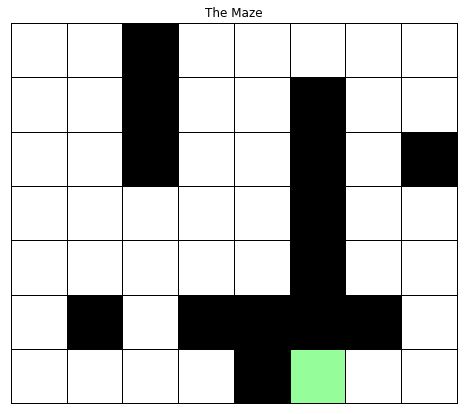

In [2]:
# with the convention 
# 0 = empty cell
# 1 = obstacle
# 2 = exit of the Maze

maze = np.array ([
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 1],
    [0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0 ,0, 0, 0, 1, 0, 0],
    [0, 1, 0, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0]
])

utils.draw_maze(maze)

# Dynamic Programming

In [4]:
env = main.SimpleMaze(maze)

{0: (0, 0), 1: (0, 1), 2: (0, 3), 3: (0, 4), 4: (0, 5), 5: (0, 6), 6: (0, 7), 7: (1, 0), 8: (1, 1), 9: (1, 3), 10: (1, 4), 11: (1, 6), 12: (1, 7), 13: (2, 0), 14: (2, 1), 15: (2, 3), 16: (2, 4), 17: (2, 6), 18: (3, 0), 19: (3, 1), 20: (3, 2), 21: (3, 3), 22: (3, 4), 23: (3, 6), 24: (3, 7), 25: (4, 0), 26: (4, 1), 27: (4, 2), 28: (4, 3), 29: (4, 4), 30: (4, 6), 31: (4, 7), 32: (5, 0), 33: (5, 2), 34: (5, 7), 35: (6, 0), 36: (6, 1), 37: (6, 2), 38: (6, 3), 39: (6, 5), 40: (6, 6), 41: (6, 7)}
{(0, 0): 0, (0, 1): 1, (0, 3): 2, (0, 4): 3, (0, 5): 4, (0, 6): 5, (0, 7): 6, (1, 0): 7, (1, 1): 8, (1, 3): 9, (1, 4): 10, (1, 6): 11, (1, 7): 12, (2, 0): 13, (2, 1): 14, (2, 3): 15, (2, 4): 16, (2, 6): 17, (3, 0): 18, (3, 1): 19, (3, 2): 20, (3, 3): 21, (3, 4): 22, (3, 6): 23, (3, 7): 24, (4, 0): 25, (4, 1): 26, (4, 2): 27, (4, 3): 28, (4, 4): 29, (4, 6): 30, (4, 7): 31, (5, 0): 32, (5, 2): 33, (5, 7): 34, (6, 0): 35, (6, 1): 36, (6, 2): 37, (6, 3): 38, (6, 5): 39, (6, 6): 40, (6, 7): 41}


TypeError: cannot unpack non-iterable int object

In [ ]:
start_agent     = (0,0)
start_minotaur  = (2,4)
horizon = 20

V, policy = main.dynamic_programming(env, horizon, env.rewards, env.transition_probabilities)

path, victory, policy = env.simulateDynProg(start_agent, start_minotaur, V, policy)
print(victory)

In [ ]:
main.animate_solution(env.maze, path, policy, env, 'DynProg')

#  Value Iteration 

In [ ]:
# Create an environment maze
env = main.Maze(maze)
# env.show()

In [ ]:
start_agent     = (6,3)
start_minotaur  = (2,3)
gamma = 0.9
epsilon = 0.3

V, policy = main.value_iteration(env, gamma, epsilon, env.rewards, env.transition_probabilities, env.n_states)

path, victory, policy = env.simulateValIter(start_agent, start_minotaur, V, policy)
print(victory)

#  Policy Iteration